<a id="header"></a>
# Part 3: levels 52-61

### Other parts
[Part 1: levels 1-49](../sam-part-1/)

[Part 2: levels 50-51](../sam-part-2/)

[Part 3: levels 52-61]()

[Part 4: levels 62-70]()

In [1]:
from samurai import *
from plotting import *

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb
from IPython.display import display
%matplotlib inline

pd.options.display.max_rows = None

## lvl 52-61

Level 52 introduces your second buff and first Kenki spender, Hissatsu: Kaiten. This ability, on a short 5s recast timer, increases the potency of your next weaponskill by 50% at the cost of 20 Kenki. Since it is applied to the potency, it does not affect the "additional effect" aka the DoT of Higanbana. Therefore, it's basically our version of Life Surge or Barrage and we want to use it on Midare Setsugekka or Tenka Goken.

**Note: At this time, it is unknown how Kenki Mastery I (lvl 52 trait) differs from Kenki Mastery II (lvl 62 trait) in Kenki generation.

Level 54 introduces the gap-closer ability, Hissatsu: Gyoten, with a Kenki cost of 10. Level 56 gives the backstep disengage, Hissatsu: Yaten. While not part of an optimal dummy rotation, these mobility skills are useful in practice. Furthermore, Hissatsu: Yaten also procs Enhanced Enbi which increases the potency of the ranged weaponskill, Enbi, to 300. These two actions together allow you to disengage from point blank range and grant a GCD to move back into range at a net zero cost of Kenki (Enbi regenerates the Kenki cost of Hissatsu: Yaten.) The penalty paid is the delay in generating Sen and continuing combo actions.

At level 58, you learn Merciful Eyes, a self-heal linked to the Third Eye ability. At level 60, you obtain the Meditate ability. This ability, with a relatively short recast time of 60s, increases the Kenki gauge while channeled in battle for up to 15s. Using Meditate during extended periods of forced downtime. This opens possibilities for starting encounters with non-zero Kenki.

Assuming Kenki Mastery I grants Kenki only for combo finisher positionals, the accrual rate of Kenki is quite low, about 30 Kenki every 8 GCDs (going through all three Sen combos). If we prioritize spending Kenki on Hissatsu: Kaiten for Midare Setsugekka, we'll have a net surplus of Kenki over time, assuming we don't spend Kenki on other utility. This permits the use of Hissatsu: Kaiten on combo finishers (Kasha and Gekko) as excess Kenki accumulates, for a gain of 200 potency (unadjusted for buffs) at the cost of 25 Kenki.

### Example Hissatsu: Kaiten usage with Opener 1

In [2]:
sam = Samurai()

actions = [('Hakaze'), ('Shifu'), ('Kasha'), ('Hakaze'),
           ('Jinpu'), ('Higanbana'), ('Gekko'), ('Hakaze'),
           ('Yukikaze'), ('Hakaze'), ('Shifu'), ('Kasha', 'Hissatsu: Kaiten'),
           ('Midare Setsugekka', 'Meikyo Shisui'), ('Gekko'), ('Yukikaze'), ('Kasha', 'Hissatsu: Kaiten'),
           ('Midare Setsugekka'), ('Hakaze'), ('Jinpu'), ('Gekko'),
           ('Hakaze'), ('Shifu'), ('Kasha'), ('Hakaze'),
           ('Yukikaze', 'Hissatsu: Kaiten'), ('Midare Setsugekka'), ('Hakaze'),
           ('Jinpu'), ('Gekko'), ('Hakaze'), ('Shifu'),
           ('Higanbana'), ('Kasha'), ('Hakaze'), ('Yukikaze'),
           ('Hakaze'), ('Jinpu'), ('Gekko', 'Hissatsu: Kaiten'), ('Midare Setsugekka'),
           ('Hakaze'), ('Shifu'), ('Kasha'), ('Hakaze'),
           ('Jinpu'), ('Gekko'), ('Hakaze'), ('Yukikaze', 'Hissatsu: Kaiten'),
           ('Midare Setsugekka'), ('Hakaze'), ('Shifu'), ('Kasha'),
           ('Hakaze'), ('Jinpu'), ('Gekko'), ('Hakaze'),
           ('Yukikaze', 'Hissatsu: Kaiten'), ('Midare Setsugekka', 'Meikyo Shisui'), ('Kasha'), ('Gekko'),
           ('Yukikaze', 'Hissatsu: Kaiten'), ('Midare Setsugekka'), ('Hakaze'), ('Shifu'), 
           ('Kasha'), ('Higanbana')]

In [3]:
df0, average_potency, pps = sam.parse_rotation(actions)
display(df0)

average potency per GCD = 487.523430769
average potency per second = 225.320129408


,Time,Weaponskill,Ability,Potency,Jinpu,Shifu,Yukikaze,Higanbana,Kenki,Total Potency
0,0.00,Hakaze,,150.000,False,False,False,0,0,150.000
1,2.40,Shifu,,280.000,False,False,False,0,0,430.000
2,4.56,Kasha,,400.000,False,True,False,0,0,830.000
3,6.72,Hakaze,,150.000,False,True,False,0,10,980.000
4,8.88,Jinpu,,280.000,False,True,False,0,10,1260.000
5,11.04,Higanbana,,276.000,True,True,False,0,10,1536.000
6,13.20,Gekko,,493.327,True,True,False,1,10,2029.327
7,15.36,Hakaze,,205.827,True,True,False,1,20,2235.154
8,17.52,Yukikaze,,424.327,True,True,False,1,20,2659.481
9,19.68,Hakaze,,224.802,True,True,True,1,30,2884.283


** I intentionally let Kenki cap here. You would probably try to keep Kenki around 50-70 and use it on Hissatsu: Kaiten for Kasha or Gekko to prevent capping.

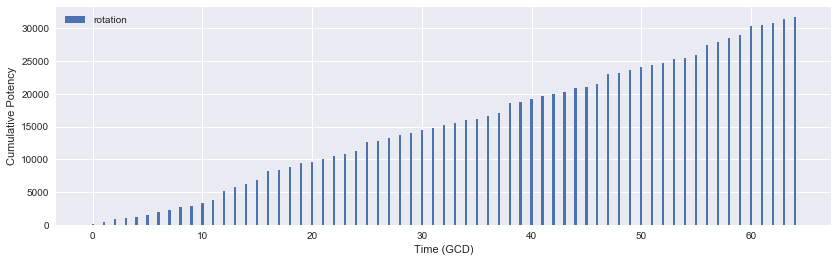

In [4]:
plot_potency(df0, truncate_actions=True)

Note the steady accrual of Kenki. Although the results shown here only shows a 10-15% increase in potency per second, remember that the excess Kenki not spent is leaving a lot of potential potency on the table. As with any other resource in the game, any of it not spent at the end of the encounter is a DPS loss.

### Example Hissatsu: Kaiten usage with Opener 3

In [5]:
sam = Samurai()

n_targets = 1

actions = [('Hakaze'), ('Shifu'), ('Kasha', 'Meikyo Shisui'),
           ('Jinpu'), ('Gekko'), ('Yukikaze', 'Hissatsu: Kaiten'), ('Midare Setsugekka'),
           ('Hakaze'), ('Yukikaze'), ('Higanbana'), ('Hakaze'),
           ('Shifu'), ('Kasha'), ('Hakaze'), ('Jinpu'),
           ('Gekko'), ('Hakaze'), ('Yukikaze', ('Hissatsu: Kaiten')), ('Midare Setsugekka'),
           ('Hakaze'), ('Shifu'), ('Kasha'), ('Hakaze'),
           ('Jinpu'), ('Gekko'), ('Hakaze'), ('Yukikaze', 'Hissatsu: Kaiten'),
           ('Midare Setsugekka'), ('Hakaze'), ('Shifu'), ('Kasha'),
           ('Hakaze'), ('Jinpu'), ('Gekko'), ('Hakaze'),
           ('Yukikaze', 'Hissatsu: Kaiten'), ('Midare Setsugekka'), ('Hakaze'), ('Shifu'),
           ('Kasha'), ('Higanbana', 'Meikyo Shisui'), ('Kasha'), ('Gekko'),
           ('Yukikaze', 'Hissatsu: Kaiten'),('Midare Setsugekka')]

In [6]:
df1, average_potency, pps = sam.parse_rotation(actions)
display(df1)

average potency per GCD = 486.819977778
average potency per second = 224.824497126


,Time,Weaponskill,Ability,Potency,Jinpu,Shifu,Yukikaze,Higanbana,Kenki,Total Potency
0,0.00,Hakaze,,150.000,False,False,False,0,0,150.000
1,2.40,Shifu,,280.000,False,False,False,0,0,430.000
2,4.56,Kasha,Meikyo Shisui,400.000,False,True,False,0,0,830.000
3,6.72,Jinpu,,280.000,False,True,False,0,10,1110.000
4,8.88,Gekko,,460.000,True,True,False,0,10,1570.000
5,11.04,Yukikaze,Hissatsu: Kaiten,391.000,True,True,False,0,20,1961.000
6,13.20,Midare Setsugekka,,1378.620,True,True,True,0,10,3339.620
7,15.36,Hakaze,,191.475,True,True,True,0,10,3531.095
8,17.52,Yukikaze,,434.010,True,True,True,0,10,3965.105
9,19.68,Higanbana,,306.360,True,True,True,0,20,4271.465


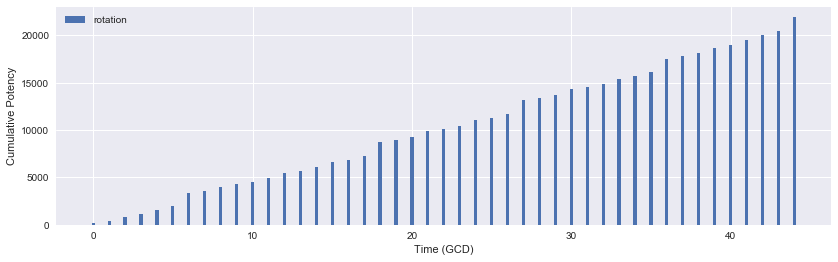

In [7]:
plot_potency(df1, truncate_actions=True)

### Example Hissatsu: Kaiten usage with AoE rotations

In [8]:
dfs_aoe = []
pps_aoe = []
labels = []

n_target_range = range(2, 8)

for n_targets in n_target_range:
    sam = Samurai()
    
    actions = [('Hakaze'), ('Shifu'), ('Kasha'), ('Hakaze'),
               ('Jinpu'), ('Gekko', 'Hissatsu: Kaiten'), ('Tenka Goken'), ('Fuga'),
               ('Oka'), ('Fuga'), ('Mangetsu', 'Hissatsu: Kaiten'), ('Tenka Goken'), 
               ('Fuga'), ('Mangetsu'), ('Fuga'), ('Oka', 'Hissatsu: Kaiten'), 
               ('Tenka Goken')]
    
    print('number of targets = %s' % n_targets)
    df_temp, average_potency, pps = sam.parse_rotation(actions, n_targets=n_targets)
    dfs_aoe.append(df_temp)
    pps_aoe.append(pps)
    
    labels.append('%s targets' % n_targets)
    print('\n')

display(dfs_aoe[-1])

number of targets = 2
average potency per GCD = 466.335294118
average potency per second = 214.494047619


number of targets = 3
average potency per GCD = 624.358823529
average potency per second = 287.178030303


number of targets = 4
average potency per GCD = 766.011764706
average potency per second = 352.332251082


number of targets = 5
average potency per GCD = 891.294117647
average potency per second = 409.956709957


number of targets = 6
average potency per GCD = 1000.20588235
average potency per second = 460.051406926


number of targets = 7
average potency per GCD = 1109.11764706
average potency per second = 510.146103896




,Time,Weaponskill,Ability,Potency,Jinpu,Shifu,Yukikaze,Higanbana,Kenki,Total Potency
0,0.00,Hakaze,,150.0,False,False,False,0,0,150.0
1,2.40,Shifu,,280.0,False,False,False,0,0,430.0
2,4.56,Kasha,,400.0,False,True,False,0,0,830.0
3,6.72,Hakaze,,150.0,False,True,False,0,10,980.0
4,8.88,Jinpu,,280.0,False,True,False,0,10,1260.0
5,11.04,Gekko,Hissatsu: Kaiten,460.0,True,True,False,0,10,1720.0
6,13.20,Tenka Goken,,3105.0,True,True,False,0,0,4825.0
7,15.36,Fuga,,805.0,True,True,False,0,0,5630.0
8,17.52,Oka,,1150.0,True,True,False,0,0,6780.0
9,19.68,Fuga,,805.0,True,True,False,0,10,7585.0


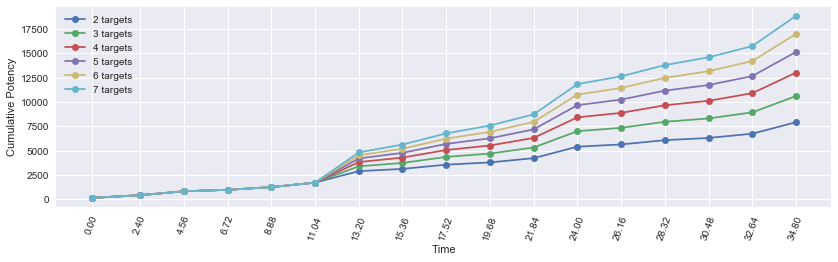

In [9]:
compare_n_potencies(dfs_aoe, labels)

There's a nice 10-20% potency per second increase just by having Hissatsu: Kaiten. The AoE weaponskill rotation, making assumptions about Kenki Mastery I, generates enough Kenki to use Hissatsu: Kaiten on Tenka Goken every time. It should put to rest the debate between Higanbana and Tenka Goken for just about every multi target situation except for, perhaps, two sturdy targets that will be in range together and live for upwards of 60s. (maybe do a simulation here)

<a href="#header">back to the top...</a>